In [37]:
from sspredict.make_prediction.read_input import read_inputjson_BCC_screw_single_calculation, read_inputjson_BCC_screw_pseudo_ternary
from sspredict.make_prediction.make_composition import build_mesh_ternary
from sspredict.make_prediction.models import ss_model_M_C_screw, ss_model_M_C_screw_pseudo_ternary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline
import ternary
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [7]:
BCC_file = '../examples/BCC_screw_Curtin/NbW/sample_input_NbW_BCC_screw.json'

In [8]:
input_data = read_inputjson_BCC_screw_single_calculation(BCC_file)


In [9]:
model = ss_model_M_C_screw(input_data)

In [10]:
model.calculate()

In [11]:
model.writedata()

In [14]:
T = model.calc_data['T']
tau_y = model.calc_data['tau_y']

No handles with labels found to put in legend.


Text(0, 0.5, '$\\tau_y$ (MPa)')

<Figure size 432x288 with 0 Axes>

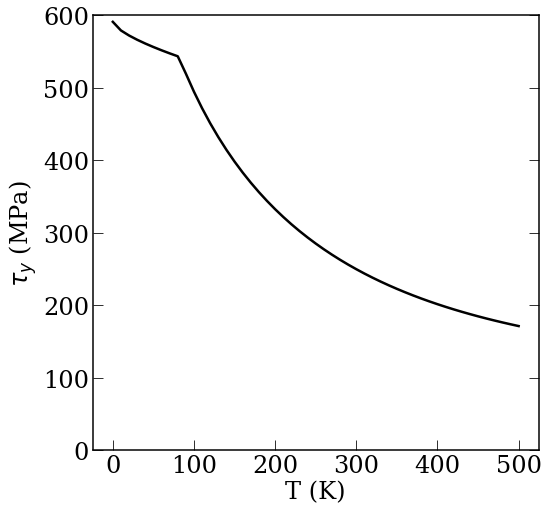

In [220]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,600)


colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256

ax1.plot(T,tau_y,color='k',mec='k',mfc='None',ms=12,ls='-',lw=2.5,label='')

ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel(r'$\tau_y$ (MPa)',fontproperties=ticks_font)

In [18]:
# ternary
BCC_ternary_file = '../examples/BCC_screw_Curtin/NbMoW/sample_input_NbMoW_BCC_screw_pseudoternary.json'

In [22]:
input_data = read_inputjson_BCC_screw_pseudo_ternary(BCC_ternary_file)

In [25]:
mesh = build_mesh_ternary(input_data.increment,input_data.psA_range,input_data.psB_range,input_data.psC_range,
                          input_data.psA_elements,input_data.psB_elements,input_data.psC_elements,
                          input_data.psA_ratio,input_data.psB_ratio,input_data.psC_ratio)
comp_tmp = mesh.make_mesh()
comp_pst, comp_elements = mesh.comp_assign()

In [26]:
model = ss_model_M_C_screw_pseudo_ternary(input_data,comp_elements,comp_pst)

In [27]:
model.calculate()

In [28]:
model.writedata()

In [29]:
model.calc_data[:5]

,comp(psA),comp(psB),comp(psC),Nb,Mo,W,a,b,a_p,T,tau_y,tau_k,tau_xk,tau_p,E_k,E_v,E_si,Delta_E_p
0,0.0,0.0,100.0,0.0,0.0,100.0,3.1600,2.7366,2.5801,300.0,739.21,795.40,336.29,402.92,0.9057,3.5655,9.5417,0.1493
1,0.0,1.0,99.0,0.0,1.0,99.0,3.1598,2.7365,2.5800,300.0,740.93,797.24,338.76,402.17,0.9019,3.5595,9.5201,0.1494
2,0.0,2.0,98.0,0.0,2.0,98.0,3.1596,2.7363,2.5798,300.0,742.66,799.08,341.25,401.41,0.8981,3.5534,9.4984,0.1495
3,0.0,3.0,97.0,0.0,3.0,97.0,3.1594,2.7361,2.5796,300.0,744.42,800.94,343.78,400.64,0.8943,3.5474,9.4768,0.1496
4,0.0,4.0,96.0,0.0,4.0,96.0,3.1592,2.7359,2.5795,300.0,746.20,802.80,346.33,399.87,0.8905,3.5413,9.4552,0.1497


In [218]:
points = model.calc_data[model.calc_data.columns[:3]].apply(tuple, axis=1)

In [219]:
points

0       (0.0, 0.0, 100.0)
1        (0.0, 1.0, 99.0)
2        (0.0, 2.0, 98.0)
3        (0.0, 3.0, 97.0)
4        (0.0, 4.0, 96.0)
              ...        
5146     (98.0, 1.0, 1.0)
5147     (98.0, 2.0, 0.0)
5148     (99.0, 0.0, 1.0)
5149     (99.0, 1.0, 0.0)
5150    (100.0, 0.0, 0.0)
Length: 5151, dtype: object

In [204]:
heatmap_dict =  dict(zip(points, model.calc_data['tau_y']))


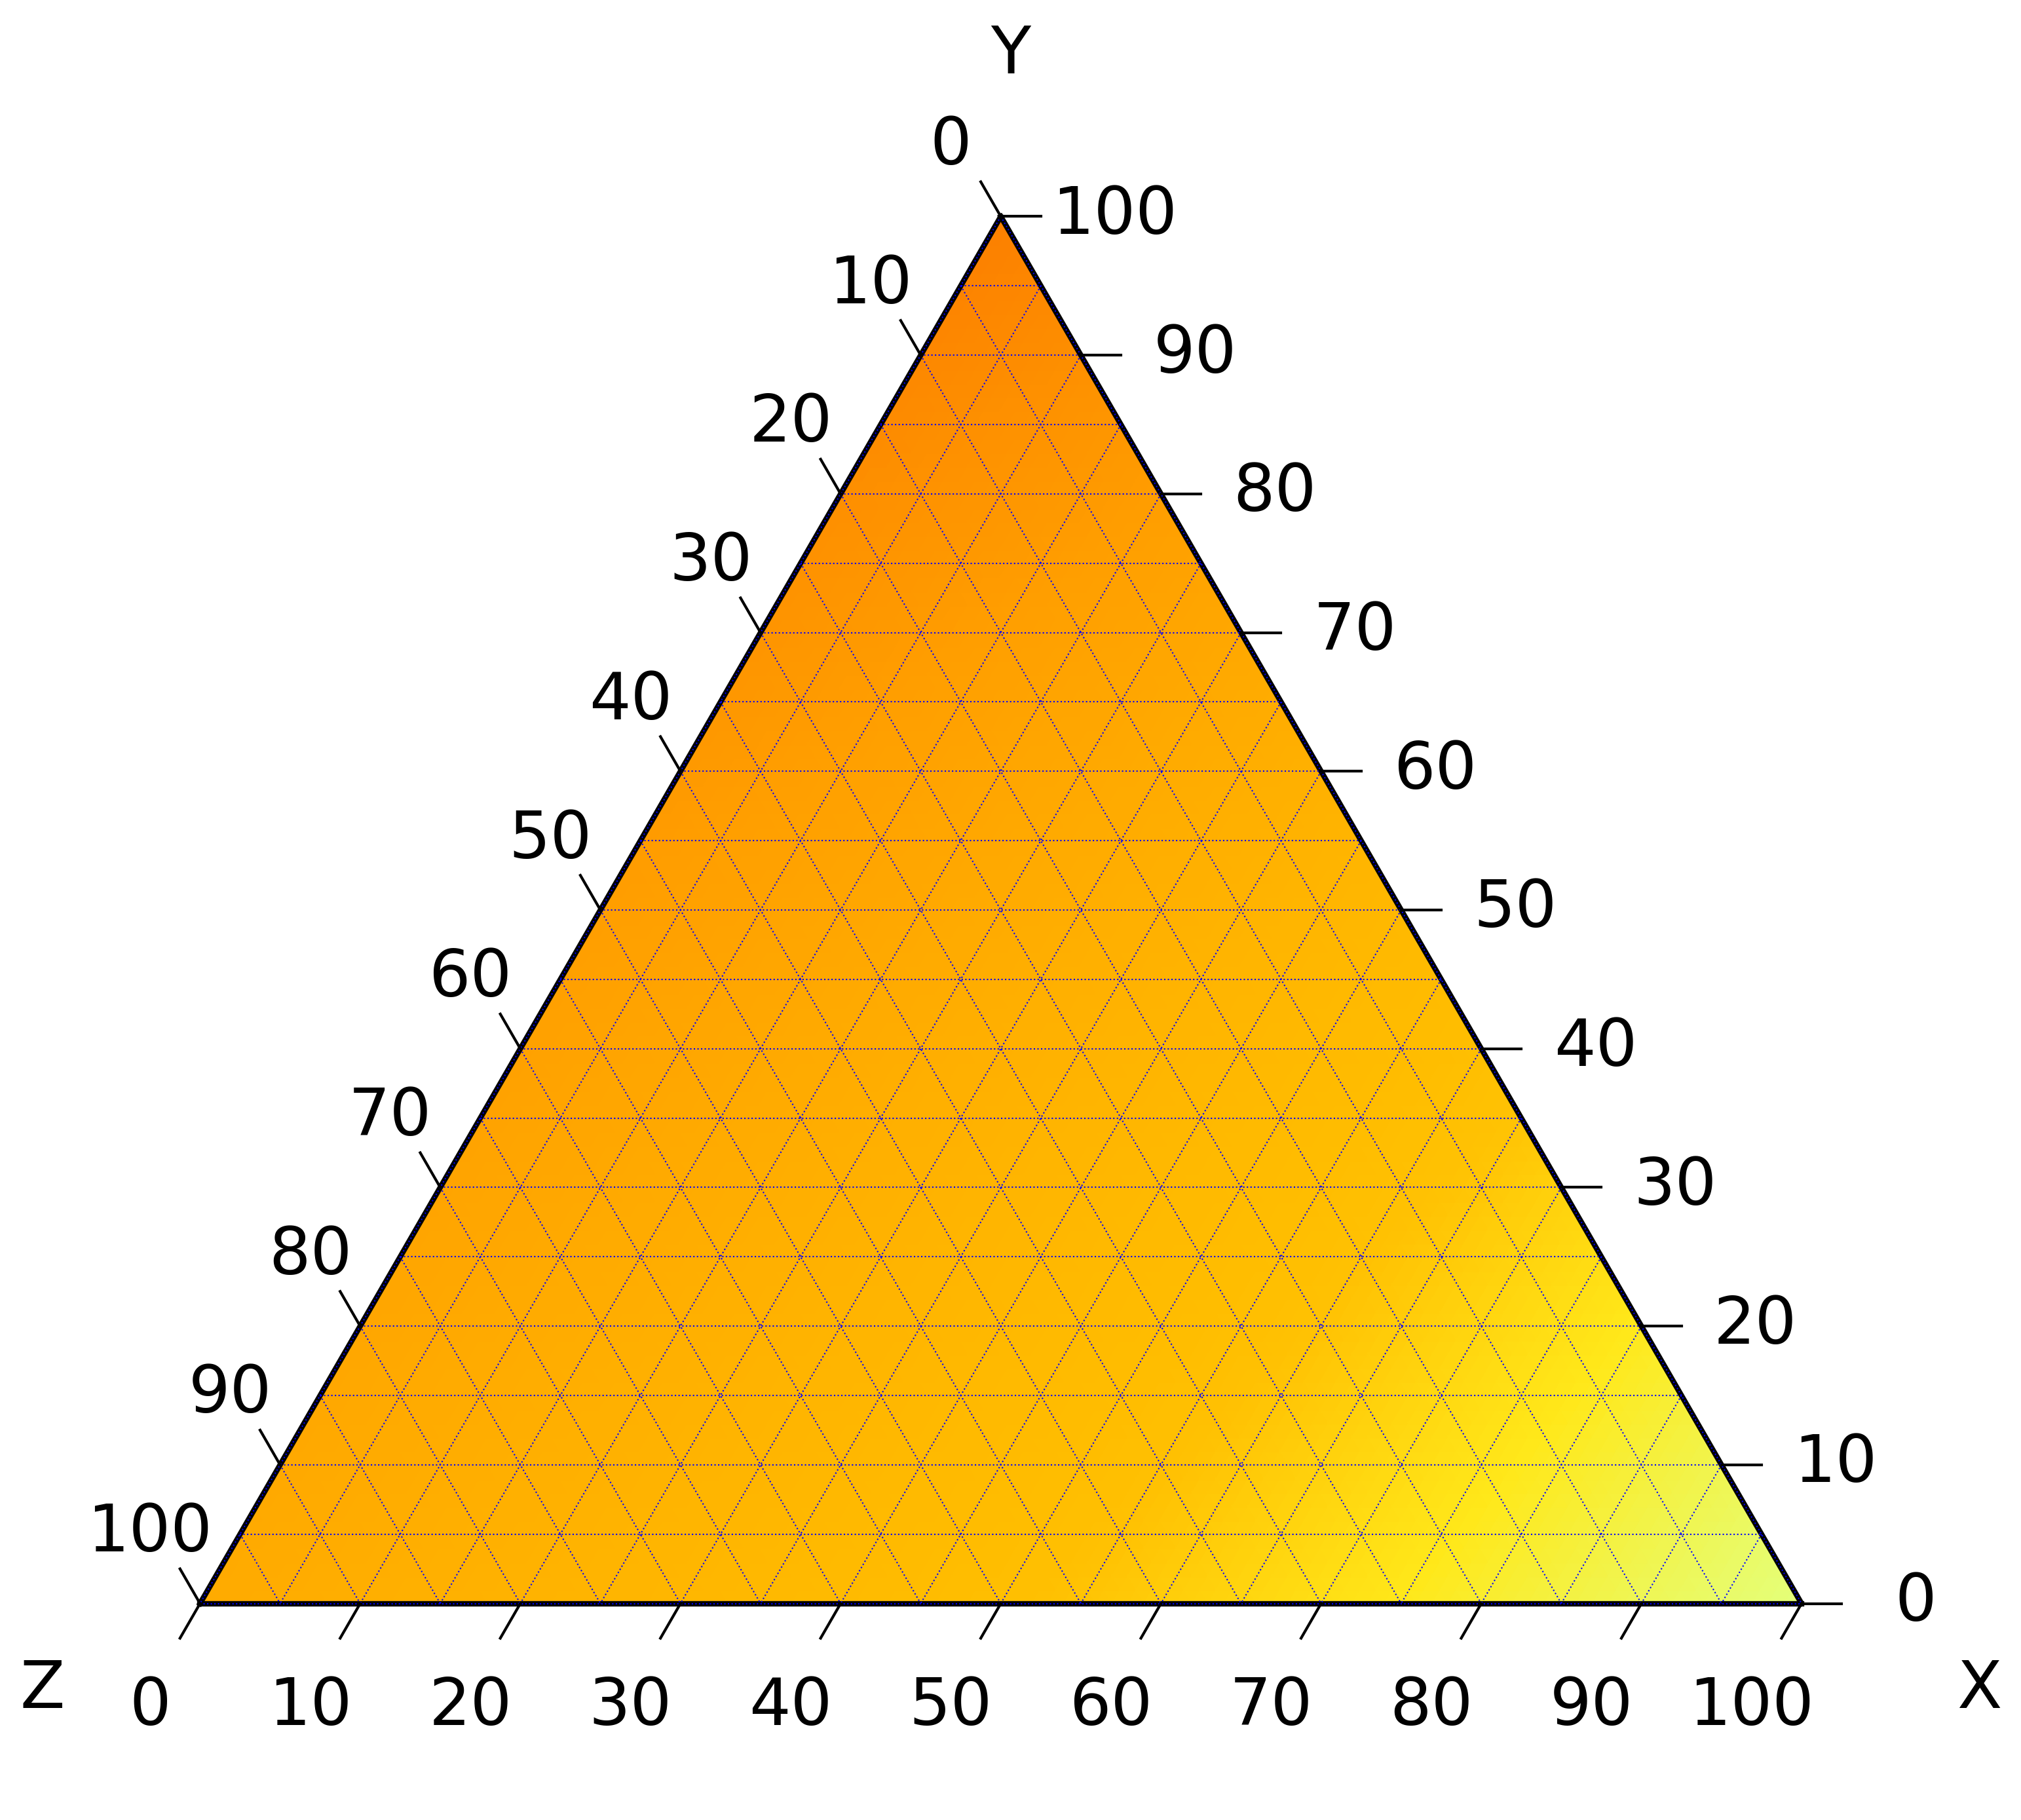

In [205]:
fig = ternary.plt.figure(figsize=(12,12),dpi=300)
ax1 = fig.add_subplot(1, 1, 1)


tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)

fontsize = 24
offset = 0.12

tax.right_corner_label("X", offset=offset,fontsize=fontsize) 
tax.top_corner_label("Y", offset=offset,fontsize=fontsize)
tax.left_corner_label("Z", offset=offset,fontsize=fontsize)


#tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=offset)
#tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=offset)
#tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=offset)


#tax.scatter(points, marker='.', color='red', label="Red Squares")
cmap='Wistia'
tax.heatmap(heatmap_dict,cmap=cmap,
            colorbar=False,
            vmin=min(model.calc_data['tau_y']),
            vmax=max(model.calc_data['tau_y']),
            cbarlabel=r'$\Delta\sigma_{ss}$ (MPa)')

tax.ticks(axis='lbr', multiple=10, linewidth=1, offset=0.025,fontsize=fontsize)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.resize_drawing_canvas()
tax.ax.axis("equal")
tax.show()

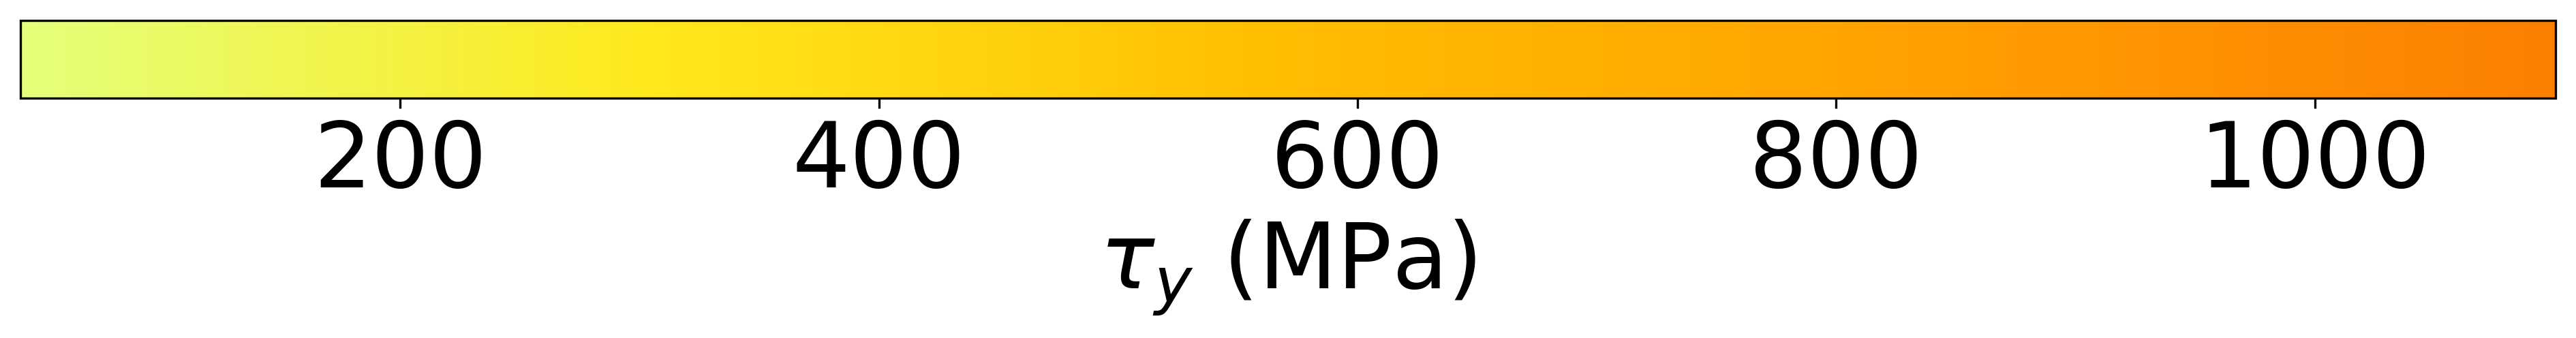

In [206]:
fig, ax = plt.subplots(figsize=(16, 1),dpi=300)
fig.subplots_adjust(bottom=0.5)
norm = mpl.colors.Normalize(vmin=min(model.calc_data['tau_y']),
                            vmax=max(model.calc_data['tau_y']))
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal')
cb.set_label(label=r'$\tau_{y}$ (MPa)',size=32)
cb.ax.tick_params(labelsize=32)

In [207]:
new_data = model.calc_data[(model.calc_data['comp(psA)']%5 ==0)&(model.calc_data['comp(psB)']%5 ==0)].reset_index()
new_data

,index,comp(psA),comp(psB),comp(psC),Nb,Mo,W,a,b,a_p,T,tau_y,tau_k,tau_xk,tau_p,E_k,E_v,E_si,Delta_E_p
0,0,0.0,0.0,100.0,0.0,0.0,100.0,3.160,2.7366,2.5801,300.0,739.21,795.40,336.29,402.92,0.9057,3.5655,9.5417,0.1493
1,5,0.0,5.0,95.0,0.0,5.0,95.0,3.159,2.7358,2.5793,300.0,747.99,804.67,348.91,399.08,0.8867,3.5353,9.4336,0.1497
2,10,0.0,10.0,90.0,0.0,10.0,90.0,3.158,2.7349,2.5785,300.0,757.28,814.18,362.28,395.00,0.8676,3.5050,9.3255,0.1502
3,15,0.0,15.0,85.0,0.0,15.0,85.0,3.157,2.7340,2.5777,300.0,767.10,823.95,376.44,390.66,0.8486,3.4748,9.2173,0.1506
4,20,0.0,20.0,80.0,0.0,20.0,80.0,3.156,2.7332,2.5769,300.0,777.51,833.99,391.48,386.03,0.8296,3.4445,9.1092,0.1511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5090,90.0,5.0,5.0,90.0,5.0,5.0,3.285,2.8449,2.6822,300.0,152.64,103.15,49.49,404.97,0.6475,3.0172,5.5767,0.0586
227,5095,90.0,10.0,0.0,90.0,10.0,0.0,3.284,2.8440,2.6814,300.0,162.69,109.30,53.39,401.41,0.6285,2.9870,5.4686,0.0597
228,5130,95.0,0.0,5.0,95.0,0.0,5.0,3.293,2.8518,2.6887,300.0,90.19,59.30,30.89,415.90,0.6533,3.0187,5.4706,0.0474
229,5135,95.0,5.0,0.0,95.0,5.0,0.0,3.292,2.8510,2.6879,300.0,98.67,64.73,33.94,412.76,0.6343,2.9884,5.3624,0.0488


In [209]:
[new_data.columns[1],new_data.columns[2],new_data.columns[3],new_data.columns[11]]

['comp(psA)', 'comp(psB)', 'comp(psC)', 'tau_y']

In [210]:
new_data = new_data[[new_data.columns[1],new_data.columns[2],new_data.columns[3],new_data.columns[11]]]
new_data.astype({'comp(psA)':np.int, 'comp(psB)':np.int,'comp(psC)':np.int, 'tau_y':np.float})

,comp(psA),comp(psB),comp(psC),tau_y
0,0,0,100,739.21
1,0,5,95,747.99
2,0,10,90,757.28
3,0,15,85,767.10
4,0,20,80,777.51
...,...,...,...,...
226,90,5,5,152.64
227,90,10,0,162.69
228,95,0,5,90.19
229,95,5,0,98.67


In [211]:
points = new_data[new_data.columns[:3]].apply(tuple, axis=1)
heatmap_dict =  dict(zip(points, new_data['tau_y']))

In [216]:
points

0      (0.0, 0.0, 100.0)
1       (0.0, 5.0, 95.0)
2      (0.0, 10.0, 90.0)
3      (0.0, 15.0, 85.0)
4      (0.0, 20.0, 80.0)
             ...        
226     (90.0, 5.0, 5.0)
227    (90.0, 10.0, 0.0)
228     (95.0, 0.0, 5.0)
229     (95.0, 5.0, 0.0)
230    (100.0, 0.0, 0.0)
Length: 231, dtype: object

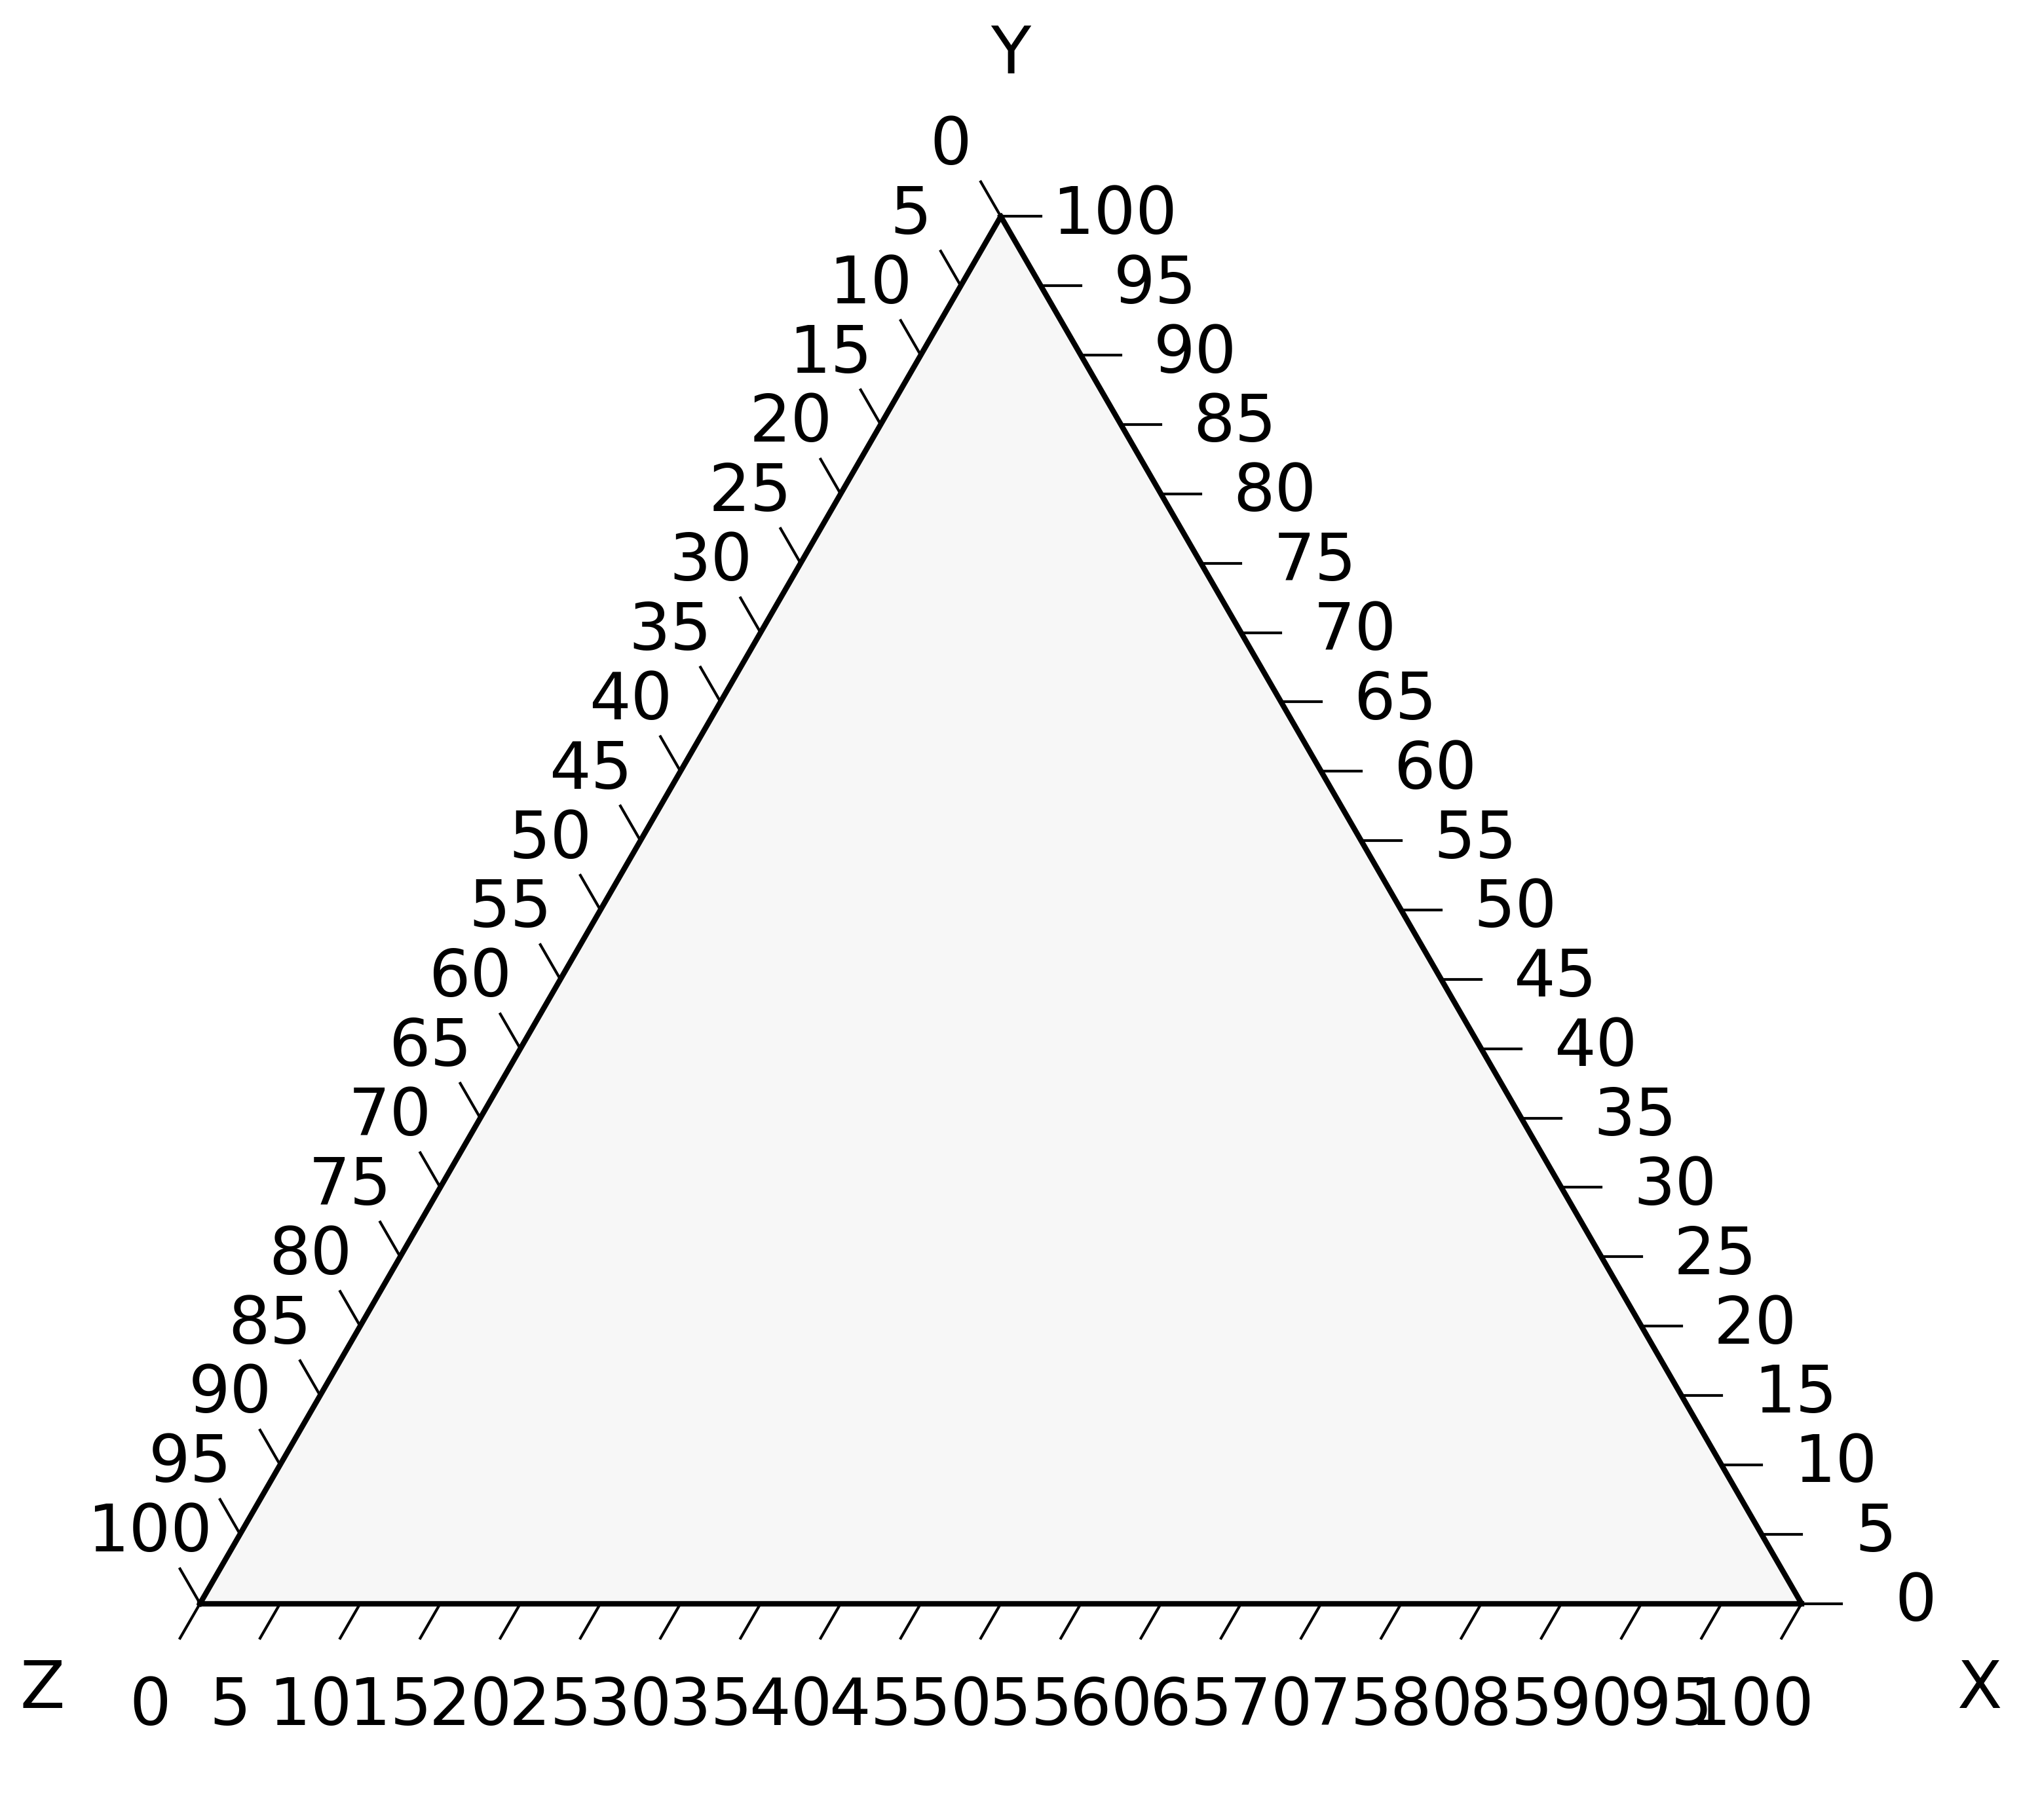

In [215]:
fig = ternary.plt.figure(figsize=(12,12),dpi=300)
ax1 = fig.add_subplot(1, 1, 1)


tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.boundary(linewidth=2.0)
#tax.gridlines(color="blue", multiple=5)

fontsize = 24
offset = 0.12

tax.right_corner_label("X", offset=offset,fontsize=fontsize) 
tax.top_corner_label("Y", offset=offset,fontsize=fontsize)
tax.left_corner_label("Z", offset=offset,fontsize=fontsize)


#tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=offset)
#tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=offset)
#tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=offset)


#tax.scatter(points, marker='.', color='red', label="Red Squares")
cmap='Wistia'
tax.heatmap(heatmap_dict,cmap=cmap,
            colorbar=False,
            vmin=min(new_data['tau_y']),
            vmax=max(new_data['tau_y']),
            cbarlabel=r'$\Delta\sigma_{ss}$ (MPa)')

tax.ticks(axis='lbr', multiple=5, linewidth=1, offset=0.025,fontsize=fontsize)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.resize_drawing_canvas()
tax.ax.axis("equal")
tax.show()

In [127]:
new_data

,index,comp(psA),comp(psB),comp(psC),Nb,Mo,W,a,b,a_p,T,tau_y,tau_k,tau_xk,tau_p,E_k,E_v,E_si,Delta_E_p
0,0,0.0,0.0,100.0,0.0,0.0,100.0,3.160,2.7366,2.5801,300.0,739.21,795.40,336.29,402.92,0.9057,3.5655,9.5417,0.1493
1,5,0.0,5.0,95.0,0.0,5.0,95.0,3.159,2.7358,2.5793,300.0,747.99,804.67,348.91,399.08,0.8867,3.5353,9.4336,0.1497
2,10,0.0,10.0,90.0,0.0,10.0,90.0,3.158,2.7349,2.5785,300.0,757.28,814.18,362.28,395.00,0.8676,3.5050,9.3255,0.1502
3,15,0.0,15.0,85.0,0.0,15.0,85.0,3.157,2.7340,2.5777,300.0,767.10,823.95,376.44,390.66,0.8486,3.4748,9.2173,0.1506
4,20,0.0,20.0,80.0,0.0,20.0,80.0,3.156,2.7332,2.5769,300.0,777.51,833.99,391.48,386.03,0.8296,3.4445,9.1092,0.1511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5090,90.0,5.0,5.0,90.0,5.0,5.0,3.285,2.8449,2.6822,300.0,152.64,103.15,49.49,404.97,0.6475,3.0172,5.5767,0.0586
227,5095,90.0,10.0,0.0,90.0,10.0,0.0,3.284,2.8440,2.6814,300.0,162.69,109.30,53.39,401.41,0.6285,2.9870,5.4686,0.0597
228,5130,95.0,0.0,5.0,95.0,0.0,5.0,3.293,2.8518,2.6887,300.0,90.19,59.30,30.89,415.90,0.6533,3.0187,5.4706,0.0474
229,5135,95.0,5.0,0.0,95.0,5.0,0.0,3.292,2.8510,2.6879,300.0,98.67,64.73,33.94,412.76,0.6343,2.9884,5.3624,0.0488
